In [82]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [83]:
# function (as a function)
def f(x):
  return 2*x**2 - 2*x + 3

# derivative function
def df(x):
  return 4*x - 2

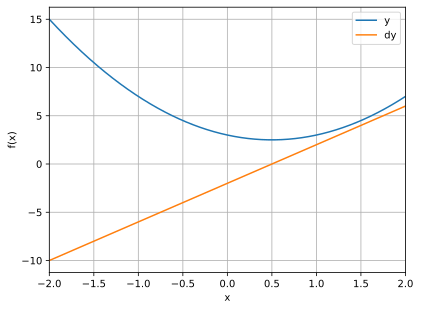

In [84]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,f(x), x,df(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [85]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

modelparams = np.zeros((training_epochs, 2))

# Gradient Descent code
for i in range(training_epochs):
  grad = df(localmin)
  
  modelparams[i, 0] = localmin[0] 
  modelparams[i, 1] = grad[0]     

  localmin = localmin - learning_rate*grad


C:\Users\Theo\AppData\Local\Temp\ipykernel_27012\3860697947.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


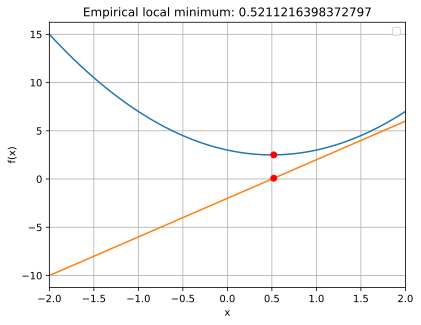

In [86]:
# plot the results

plt.plot(x,f(x), x,df(x))
plt.plot(localmin,df(localmin),'ro')
plt.plot(localmin,f(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

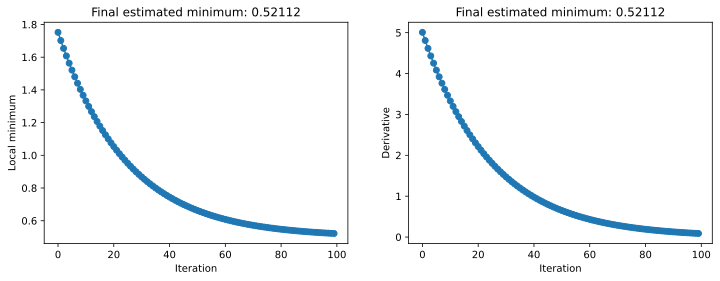

In [87]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum') 
ax[1].set_ylabel('Derivative')

plt.show()

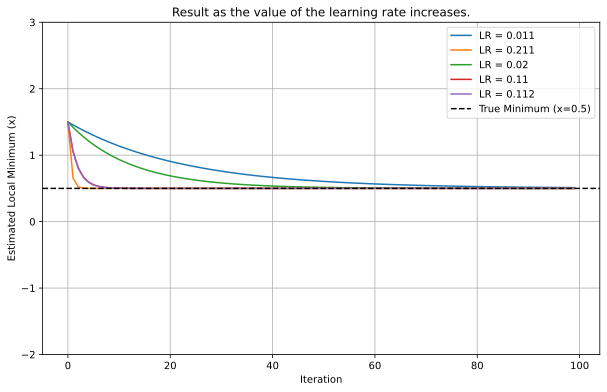

In [88]:
# Define parameters
training_epochs = 100
learning_rates = 0.011, 0.211, 0.02, 0.11, 0.112 
start_val = 1.5

plt.figure(figsize=(10, 6))

for rate in learning_rates:
  localmin = np.array([start_val])
  modelparams = np.zeros((training_epochs, 1))
  
  
  for i in range(training_epochs):
    grad = df(localmin)
    modelparams[i, 0] = localmin[0] 
    localmin = localmin - rate * grad 
  
  # plot the local minimum history
  plt.plot(modelparams, label=f'LR = {rate}')

plt.axhline(0.5, color='black', linestyle='--', label='True Minimum (x=0.5)')
plt.xlabel('Iteration')
plt.ylabel('Estimated Local Minimum (x)')
plt.title('Result as the value of the learning rate increases.')
plt.ylim(-2, 3)
plt.legend()
plt.grid()
plt.show()

Starting gradient descent from x = -0.5480
Stopping when gradient < 0.001

--- Loop finished (100 epochs) ---
Final Gradient: -0.048725
Final Local Min (x): 0.488355


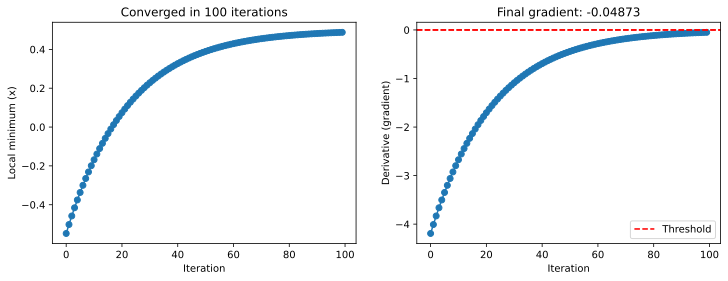

In [89]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = 0.011
training_epochs = 100

# 1. Define a threshold
gradient_threshold = 0.001

# 2. Use a list to store parameters
modelparams_list = []

print(f"Starting gradient descent from x = {localmin[0]:.4f}")
print(f"Stopping when gradient < {gradient_threshold}\n")

for i in range(training_epochs):
  grad = df(localmin)
  
  # Store parameters
  modelparams_list.append([localmin[0], grad[0]])
  
  # 3. Add the early stopping condition
  if np.abs(grad[0]) < gradient_threshold:
    print(f"--- Early stopping triggered! ---")
    print(f"Iteration: {i}")
    print(f"Gradient: {grad[0]:.6f}")
    print(f"Local Min (x): {localmin[0]:.6f}")
    break 
  
  # Update step
  localmin = localmin - learning_rate*grad
else:
  print(f"--- Loop finished (100 epochs) ---")
  print(f"Final Gradient: {grad[0]:.6f}")
  print(f"Final Local Min (x): {localmin[0]:.6f}")

# Convert the list to a numpy array for plotting
modelparams_early_stop = np.array(modelparams_list)

# --- Plot the results ---
fig,ax = plt.subplots(1,2,figsize=(12,4))

# Plot 1: Local minimum (x) over iterations
ax[0].plot(modelparams_early_stop[:,0],'o-')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Local minimum (x)')
ax[0].set_title(f'Converged in {modelparams_early_stop.shape[0]} iterations')

# Plot 2: Derivative (gradient) over iterations
ax[1].plot(modelparams_early_stop[:,1],'o-')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Derivative (gradient)')
ax[1].axhline(gradient_threshold, color='r', linestyle='--', label='Threshold')
ax[1].axhline(-gradient_threshold, color='r', linestyle='--')
ax[1].set_title(f'Final gradient: {modelparams_early_stop[-1,1]:.5f}')

plt.legend()
plt.show()